In [2]:
import sys
import os
p = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(p, '..')))
sys.path

['/home/powell/work/insight/focal/notebooks',
 '/home/powell/work/insight/bablu/deps/models/research',
 '/home/powell/work/insight/bablu/deps/models/research/slim',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/powell/work/insight/insight/lib/python3.6/site-packages',
 '/home/powell/work/insight/insight/lib/python3.6/site-packages/mask_rcnn-2.1-py3.6.egg',
 '/home/powell/work/insight/insight/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg',
 '/home/powell/work/insight/insight/lib/python3.6/site-packages/IPython/extensions',
 '/home/powell/.ipython',
 '/home/powell/work/insight/focal']

In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.color
import skimage.io
import scipy.ndimage
import matplotlib
import matplotlib.pyplot as plt
import cv2
import datetime
import time
from skimage.transform import warp, AffineTransform

from utils.mrcnn_helper import show_images
from data.indoor import get_image_paths
from data.portrait_indoor_aug import portrait_indoor_embed

%matplotlib inline

Using TensorFlow backend.


In [4]:
SCENE_DIR='/mnt/data/indoor/Images'
def show_rnd_scene_images(prefix, category, size=4):
    dir_prefix=os.path.join(prefix, category)
    file_names = random.sample(next(os.walk(dir_prefix))[2], size)
    images = [skimage.io.imread(os.path.join(dir_prefix, x)) for x in file_names]
    show_images(images, [category]*size)
    return images

def get_images_size(prefix, predicate_fn):
    output_list = []
    image_list = get_image_paths(prefix)
    images_loaded = [skimage.io.imread(os.path.join(prefix, x)) for x in image_list]
    images_loaded = [x for x in images_loaded if predicate_fn(x.shape[0], x.shape[1]) is True]
    return images_loaded                    

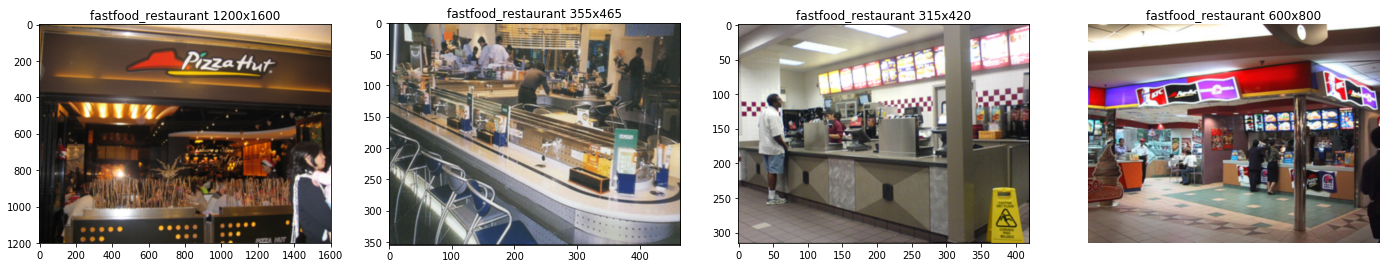

In [5]:
rnd_indoor_images = show_rnd_scene_images(prefix=SCENE_DIR, category='fastfood_restaurant')

In [117]:
indoor_images_size_list = get_images_size(prefix=SCENE_DIR, predicate_fn = lambda h,w: w < h and w < 600 and 800 - h < 600 - w)

84


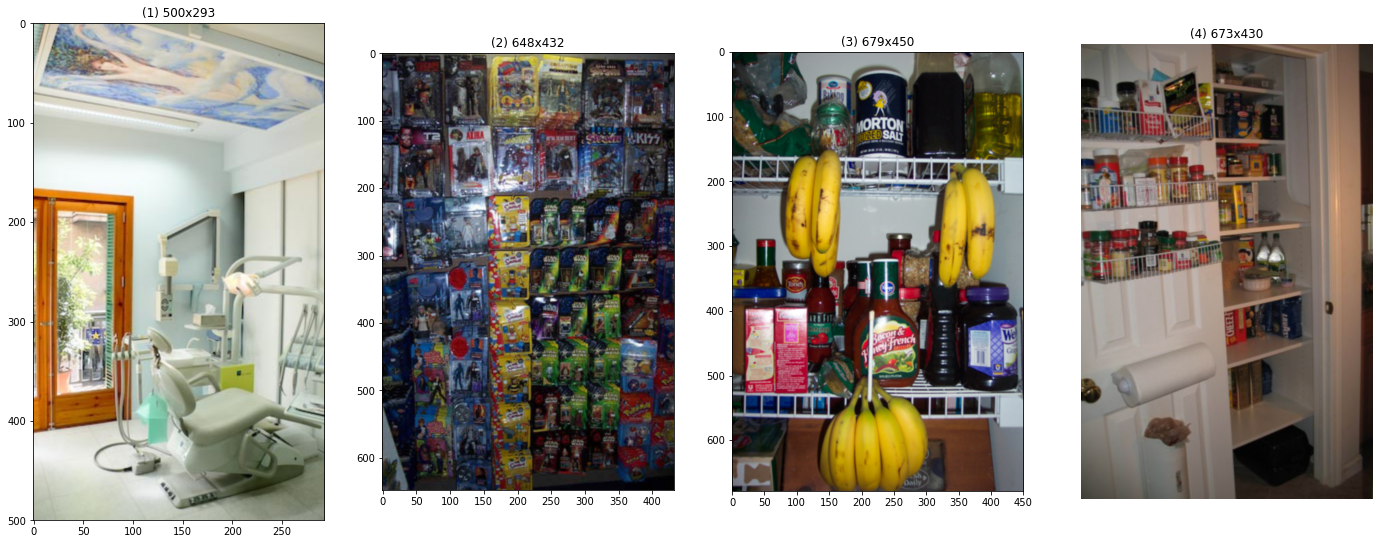

In [119]:
print(len(indoor_images_size_list))
images_size_rnd_list = random.sample(indoor_images_size_list, 4)
show_images(images_size_rnd_list)

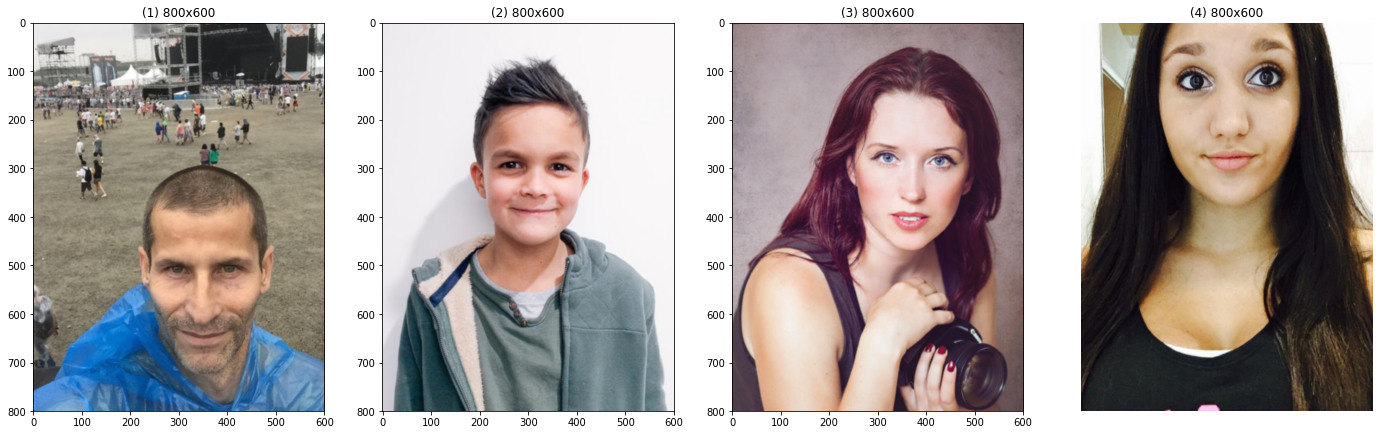

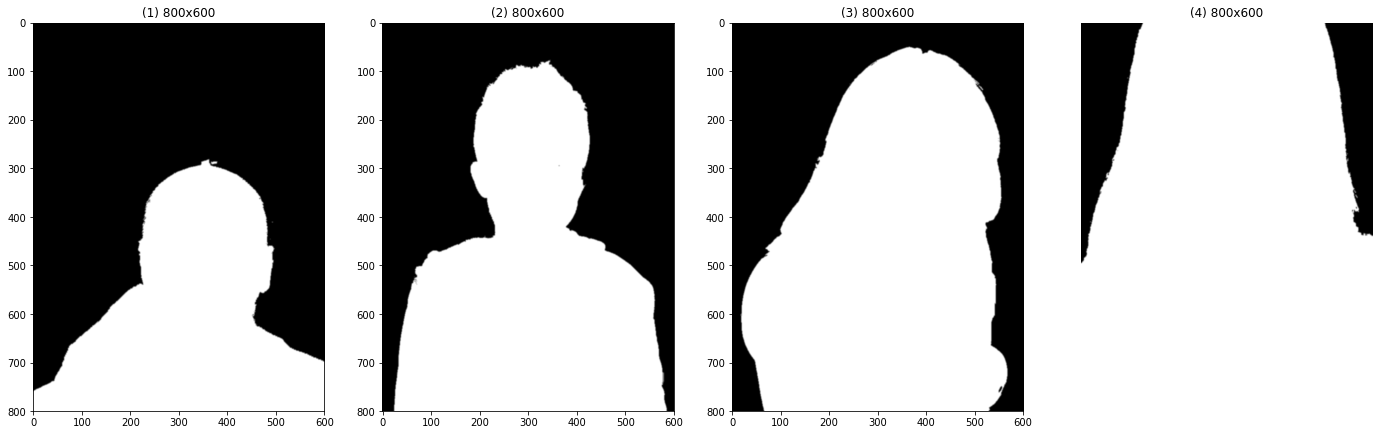

In [6]:
ORIG_IMAGE_DIR='/mnt/data/portraitfcn/eg_code_data_release_processed/data/images_data_crop'
IMAGE_DIR='/mnt/data/portraitfcn/eg_code_data_release_processed/data/images_mask_png'
orig_file_names = next(os.walk(ORIG_IMAGE_DIR))[2]
orig_image_list = random.sample(orig_file_names, 4)
orig_image_path_list = [skimage.io.imread(os.path.join(ORIG_IMAGE_DIR, x)) for x in orig_image_list]
mask_image_path_list = [skimage.io.imread(os.path.join(IMAGE_DIR, '{}.png'.format(x.split('.')[0]))) for x in orig_image_list ]
show_images(orig_image_path_list)
show_images(mask_image_path_list)

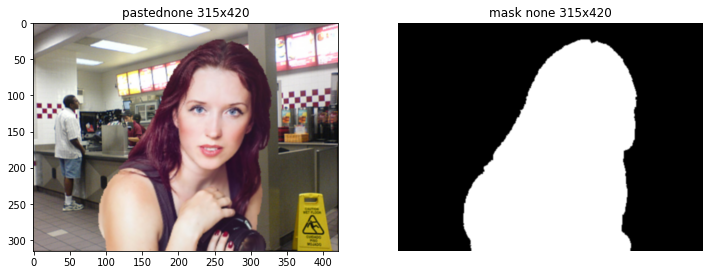

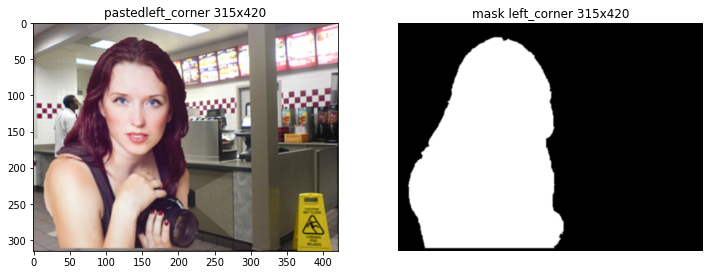

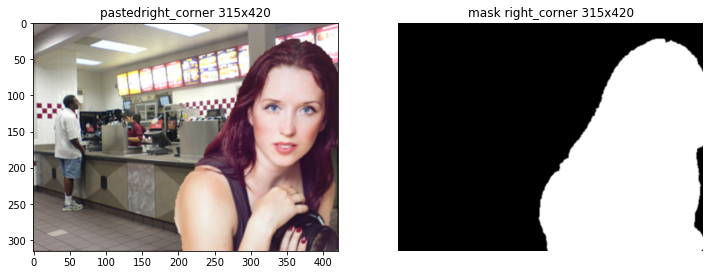

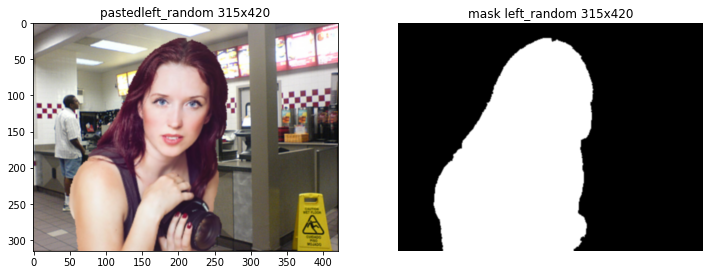

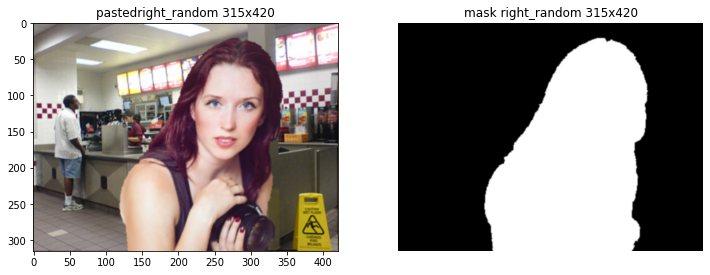

In [11]:
shift_args = ['none', 'left_corner', 'right_corner', 'left_random', 'right_random']
for a in shift_args:
    embedded_image, mask = portrait_indoor_embed(portrait_image_input=orig_image_path_list[2], 
                                                 portrait_mask_input=mask_image_path_list[2], 
                                                 indoor_image_input=rnd_indoor_images[2],
                                                 shift_arg=a, random_affine=True, intensity=1.0)
    show_images([embedded_image, mask], ["pasted{}".format(a), "mask {}".format(a)])

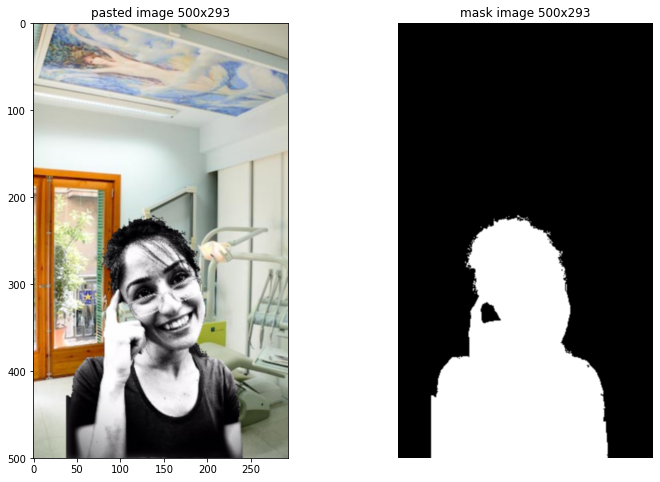

In [139]:
embedded_image_2, mask_2 =  portrait_indoor_embed(portrait_image_input=orig_image_path_list[2], 
                                              portrait_mask_input=mask_image_path_list[2], 
                                              indoor_image_input=images_size_rnd_list[0])
show_images([embedded_image_2, mask_2], ["pasted image", "mask image"])